### Import Libraries

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<!--  -->

### Sample Data

In [27]:
x = tf.linspace(-2, 2, 150) # Generates a sequence of numbers linearly spaced between a specified start(-2) and stop(2) value
x = tf.cast(x, tf.float32)

print("Sample Data: Size", x.shape[0])
print("Sample Data: ", x)

Sample Data: Size 150
Sample Data:  tf.Tensor(
[-2.         -1.9731543  -1.9463087  -1.919463   -1.8926175  -1.8657718
 -1.8389262  -1.8120805  -1.7852349  -1.7583892  -1.7315437  -1.704698
 -1.6778524  -1.6510067  -1.6241611  -1.5973154  -1.5704699  -1.5436242
 -1.5167785  -1.4899329  -1.4630872  -1.4362416  -1.4093959  -1.3825504
 -1.3557047  -1.3288591  -1.3020134  -1.2751678  -1.2483221  -1.2214766
 -1.1946309  -1.1677853  -1.1409396  -1.114094   -1.0872483  -1.0604026
 -1.033557   -1.0067114  -0.9798658  -0.95302016 -0.9261745  -0.8993289
 -0.8724832  -0.84563756 -0.8187919  -0.7919463  -0.76510066 -0.738255
 -0.7114094  -0.68456376 -0.6577181  -0.6308725  -0.60402685 -0.5771812
 -0.5503356  -0.52348995 -0.4966443  -0.46979865 -0.44295302 -0.4161074
 -0.38926175 -0.36241612 -0.33557048 -0.30872482 -0.2818792  -0.25503355
 -0.22818792 -0.20134228 -0.17449665 -0.147651   -0.12080537 -0.09395973
 -0.06711409 -0.04026845 -0.01342282  0.01342282  0.04026845  0.06711409
  0.09395973  0.

In [28]:
# Cubic Function
def f(x):
    # More quadratic affect and negative linear
    y = (2.8 * x**2) + (-2 * x) + 0.05
    return y

y = f(x) + tf.random.normal(shape=[x.shape[0]])
y

<tf.Tensor: shape=(150,), dtype=float32, numpy=
array([16.86047   , 17.812447  , 15.062784  , 14.528991  , 14.307409  ,
       12.520109  , 14.071796  , 12.088032  , 13.155343  , 13.439983  ,
       13.017149  , 12.179027  , 10.811297  ,  9.989182  ,  9.744231  ,
       10.754545  ,  9.086811  , 10.573652  , 10.712471  ,  8.627574  ,
        8.651792  ,  9.394912  ,  6.8943443 ,  7.8553457 ,  8.565826  ,
        8.378825  ,  6.6271896 ,  6.414772  ,  6.4618144 ,  8.065234  ,
        6.680588  ,  6.4528403 ,  5.116329  ,  6.1079783 ,  4.591455  ,
        5.937734  ,  6.0633955 ,  4.769125  ,  4.0730486 ,  3.9157186 ,
        3.736381  ,  4.8159595 ,  4.1366982 ,  2.7994332 ,  3.404657  ,
        1.9328141 ,  1.996486  ,  2.0140638 ,  2.7905695 ,  2.3644323 ,
        2.8109877 ,  2.4359183 ,  2.0648928 ,  3.6585832 ,  1.2110875 ,
        1.3743815 ,  2.0124745 ,  0.2474742 ,  3.118975  ,  0.84000623,
        1.3059182 ,  1.5677027 ,  0.42167175, -0.19696349,  1.3488934 ,
        1.129134

<!--  -->

### EDA

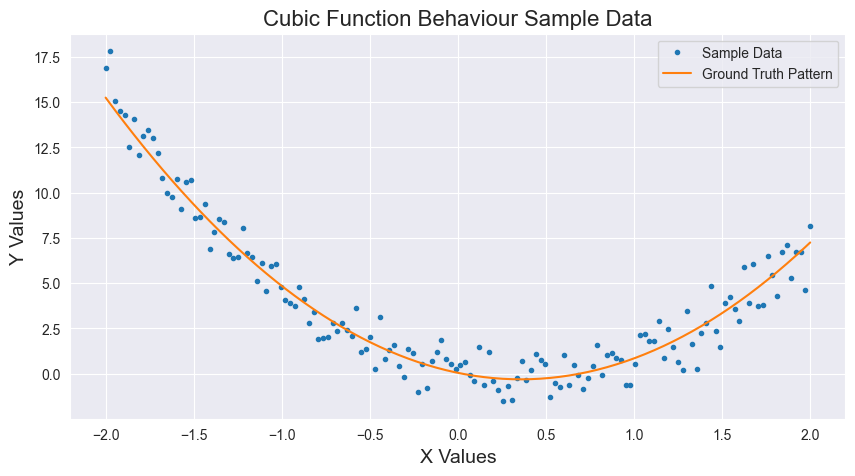

In [29]:
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.plot(x, y.numpy(), '.', label='Sample Data')
plt.plot(x, f(x), label='Ground Truth Pattern')
plt.title('Cubic Function Behaviour Sample Data', fontsize=16)
plt.xlabel('X Values', fontsize=14)
plt.ylabel('Y Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

- *Model Prediction*

In [30]:
def plot_preds(x, y, f, model, title, pred_type):
    sns.set_style("dark")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    plt.plot(x, y.numpy(), '.', label='Sample Data')
    plt.plot(x, f(x), label='Ground Truth Pattern')
    plt.plot(x, model(x), label=pred_type)
    plt.title(title, fontsize=16)
    plt.xlabel('X Values', fontsize=14)
    plt.ylabel('Y Values', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()  

<!--  -->

### Model Structure

- **Input Layer**: Takes x and creates features [x, x**2].
- **Dense Layer (Output Layer)**: Computes the weighted sum of [x, x**2] and produces a single output.

### Loss Function Optimization

* The loss (mean squared error) is minimized using the SGD optimizer, which updates the weights of the Dense layer during training.

### Activation Function & Model Prediction

* There is no explicit activation function specified in the Dense layer. By default, tf.keras.layers.Dense uses a ``linear activation function i.e., identity function`` if none is provided. 
* This means the output of the Dense layer is simply the weighted sum of the inputs plus a bias term. i.e., using y as output, where y = (m0 * x**2) + (m1 * x) + c
* So, the model does not have any non-linear activation functions between the input and output layers.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


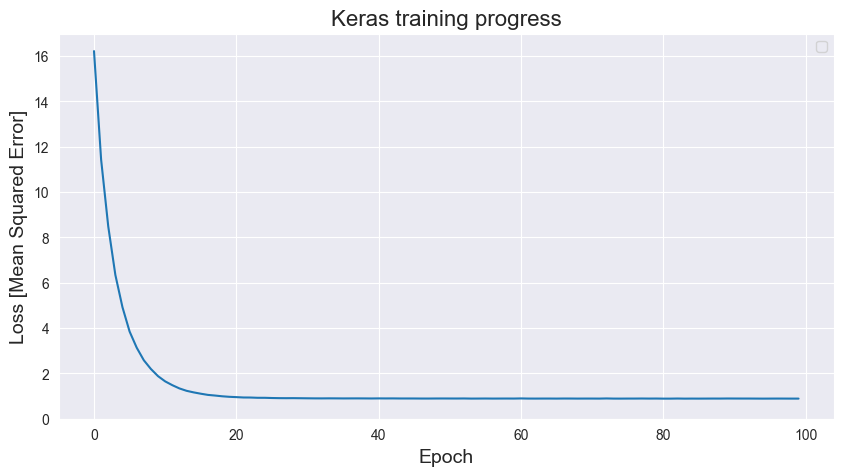

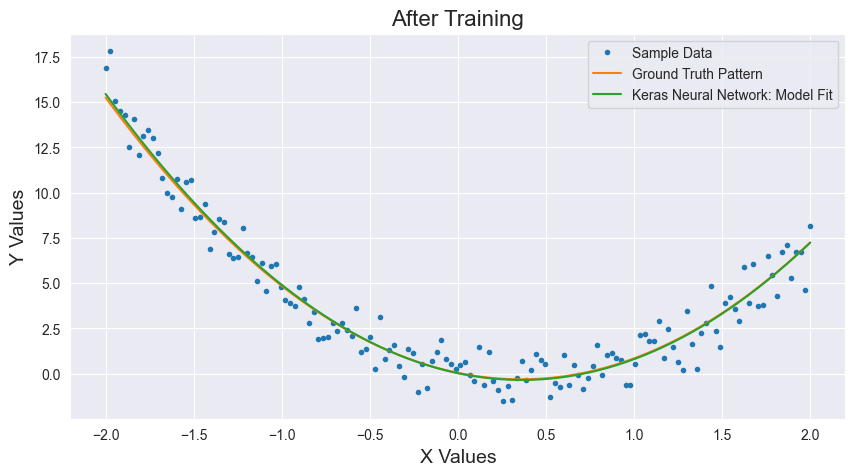

In [32]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)), # input layer
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal) # output layer
])

new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
)

history = new_model.fit(x, y, epochs=100, batch_size=32, verbose=0)
# new_model.save('./my_new_model')

sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch', fontsize=14)
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]', fontsize=14)
plt.title('Keras training progress', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


plot_preds(x, y, f, new_model, 'After Training', 'Keras Neural Network: Model Fit')